In [224]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 150

In [226]:
import numpy as np
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact, fixed


# Data
# from transat.data import HYPOTHETICAL_SUBMISSION_DATE
from transat.data.load import download_historical, load_historical
from transat.data.split import split_historical
from transat.data.transform import preprocess_historical_basic, dataframe_to_array

# Metric
from transat.metric import mae

# Scenario/Simulation
from transat.data.scenario import generate_scenario

In [227]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [228]:
HYPOTHETICAL_SUBMISSION_DATE = np.datetime64("2020-09-30")

In [229]:
download_historical()
df = load_historical()

In [230]:
df.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDispla

In [231]:
df = preprocess_historical_basic(df)

### Autocorrelation plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

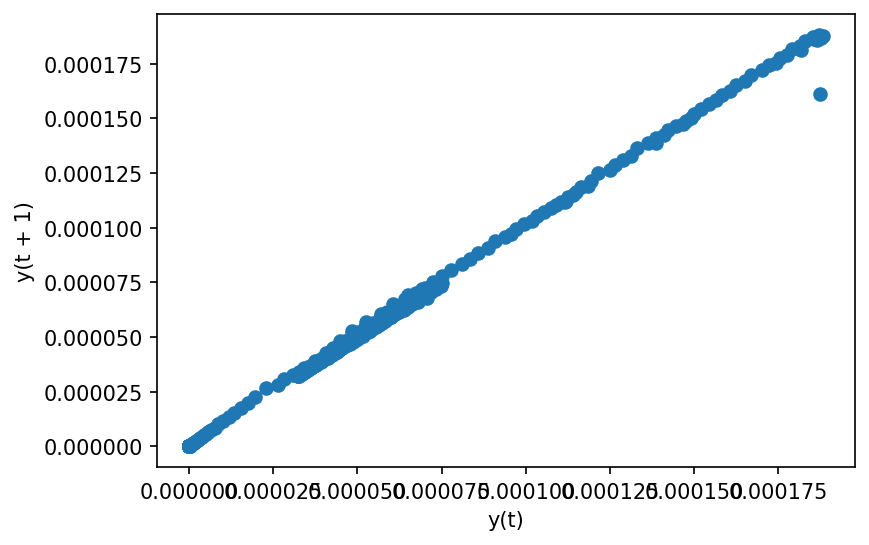

In [128]:
from pandas.plotting import lag_plot

lag_plot(df[df['CountryName']=='Russia'].NewCasesSmoothed7Days)

In [129]:
from pandas import concat

In [130]:
cases = df.NewCasesSmoothed7Days
dataframe_ = concat([cases.shift(5),cases.shift(4),cases.shift(3),cases.shift(2),cases.shift(1), cases], axis=1)
dataframe_.columns = ['t-5','t-4','t-3','t-2','t-1', 't']
result = dataframe_.corr()
print(result)

          t-5       t-4       t-3       t-2       t-1         t
t-5  1.000000  0.989929  0.977736  0.964177  0.949274  0.933270
t-4  0.989929  1.000000  0.989929  0.977736  0.964177  0.949274
t-3  0.977736  0.989929  1.000000  0.989929  0.977736  0.964177
t-2  0.964177  0.977736  0.989929  1.000000  0.989929  0.977736
t-1  0.949274  0.964177  0.977736  0.989929  1.000000  0.989929
t    0.933270  0.949274  0.964177  0.977736  0.989929  1.000000


In [131]:
#Check long time lags
cases = df.NewCasesSmoothed7Days
dataframe_ = concat([cases.shift(24),cases.shift(23),cases.shift(22),cases.shift(21), cases], axis=1)
dataframe_.columns = ['t-24','t-23','t-22','t-21', 't']
result = dataframe_.corr()
print(result)

          t-24      t-23      t-22      t-21         t
t-24  1.000000  0.989929  0.977736  0.964176  0.601352
t-23  0.989929  1.000000  0.989929  0.977736  0.618532
t-22  0.977736  0.989929  1.000000  0.989929  0.635517
t-21  0.964176  0.977736  0.989929  1.000000  0.652252
t     0.601352  0.618532  0.635517  0.652252  1.000000


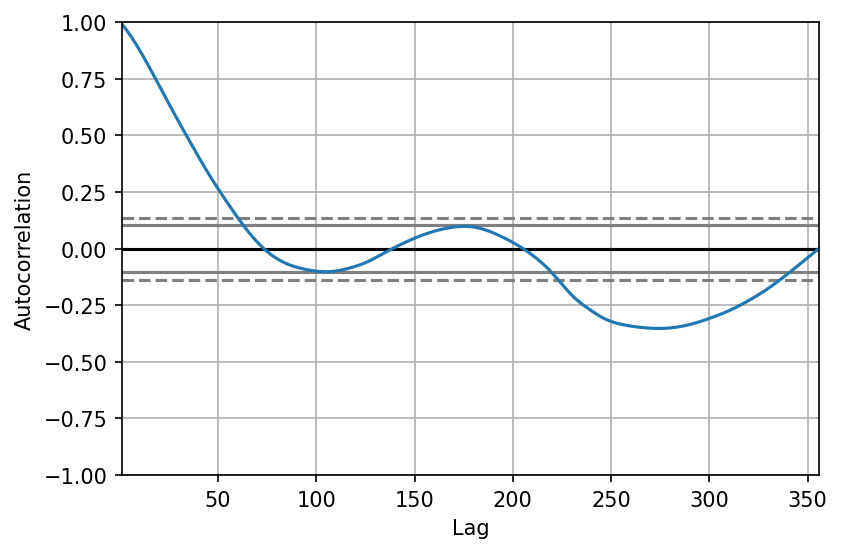

In [132]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[df['CountryName']=='Russia'].NewCasesSmoothed7Days)
plt.show()

In [133]:
which_columns = df.columns

for col_name in which_columns:
    if df[col_name].isnull().values.any():
        print(f"'{col_name}' has NaN")

'RegionName' has NaN


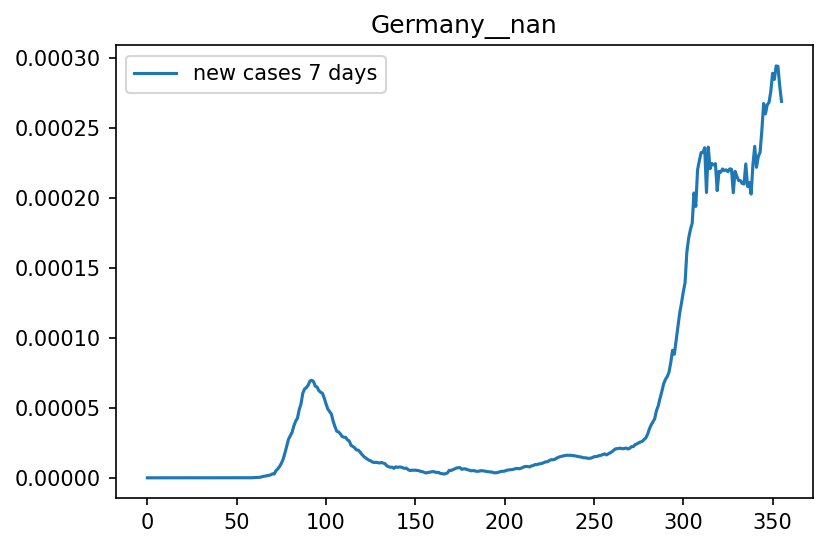

In [134]:
plt.figure()
geo_id = "Germany__nan"

plt.title(geo_id)

nc = df[df.GeoID == geo_id].NewCases.tolist()
nc7days = df[df.GeoID == geo_id].NewCasesSmoothed7Days.tolist()

# plt.plot(nc, label="new cases")
plt.plot(nc7days, label="new cases 7 days")
plt.legend()
plt.show()

In [289]:
test = pd.read_csv('./data/xprize_full_data.csv')

In [290]:
test

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Latitude,Longitude,population_density,median_age,aged_65_older,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Population
0,Afghanistan,AFG,NaN,NaN,NAT_TOTAL,33.939110,67.709953,54.422,18.6,2.5810,...,2.35,597.029,9.59,5.8,30.9,37.746,0.50,64.83,0.498,38928341.0
1,Angola,AGO,NaN,NaN,NAT_TOTAL,-11.202692,17.873887,23.890,16.8,2.4050,...,2.35,276.045,3.94,5.8,30.9,26.664,2.20,61.15,0.581,32866268.0
2,Albania,ALB,NaN,NaN,NAT_TOTAL,41.153332,20.168331,104.871,38.0,13.1880,...,1.10,304.195,10.08,7.1,51.2,47.964,2.89,78.57,0.785,2877800.0
3,Andorra,AND,NaN,NaN,NAT_TOTAL,42.546245,1.601554,163.755,29.2,6.0035,...,2.35,109.135,7.97,29.0,37.8,47.964,2.20,83.73,0.858,77265.0
4,United Arab Emirates,ARE,NaN,NaN,NAT_TOTAL,23.424076,53.847818,112.442,34.0,1.1440,...,2.35,317.840,17.26,1.2,37.4,47.964,1.20,77.97,0.863,9890400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Vanuatu,VUT,NaN,NaN,NAT_TOTAL,-15.376706,166.959158,22.662,23.1,4.3940,...,13.20,546.300,12.02,2.8,34.5,25.209,2.20,70.47,0.603,307150.0
246,Yemen,YEM,NaN,NaN,NAT_TOTAL,15.552727,48.516388,53.508,20.3,2.9220,...,18.80,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452,29825968.0
247,South Africa,ZAF,NaN,NaN,NAT_TOTAL,-30.559482,22.937506,46.754,27.3,5.3440,...,18.90,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699,59308690.0
248,Zambia,ZMB,NaN,NaN,NAT_TOTAL,-13.133897,27.849332,22.995,17.7,2.4800,...,57.50,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.588,18383956.0


In [232]:
print("Spliting at : ", HYPOTHETICAL_SUBMISSION_DATE)
df_train, df_test = split_historical(df, HYPOTHETICAL_SUBMISSION_DATE)

Spliting at :  2020-09-30


In [ ]:
np.datetime64('2020-09-30')

In [283]:
test = df_train
test['lag1'] = 0

/home/romainegele_gmail_com/anaconda3/envs/xprize/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [285]:
test['lag1'][test['Date']==np.datetime64('2020-09-30')] = test[test['Date']==str(test.Date.unique()[-2])].NewCasesSmoothed7Days.reset_index(0, drop=True)

/home/romainegele_gmail_com/anaconda3/envs/xprize/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/romainegele_gmail_com/anaconda3/envs/xprize/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [282]:
len(test[test['Date']==str(test.Date.unique()[-2])].NewCasesSmoothed7Days.values)

237

### Create lagged confirmed cases

In [233]:
#Check long time lags
cases = df.NewCasesSmoothed7Days
date = df.Date
dataframe_ = concat([date, cases.shift(24),cases.shift(23),cases.shift(22),cases.shift(21)], axis=1)
dataframe_.columns = ['Date','lag-24','lag-23','lag-22','lag-21']
dataframe_.fillna(0, inplace=True)

In [ ]:
cases = df.NewCasesSmoothed7Days
hist_ips_df["lag-24"] = future_df.groupby('GeoID')['SmoothNewCases'].shift(24).fillna(0).reset_index(0, drop=True)

In [234]:
#split lagged df
df_train_lags, df_test_lags = split_historical(dataframe_, HYPOTHETICAL_SUBMISSION_DATE)
df_train_lags=df_train_lags.drop('Date', axis=1)
df_test_lags=df_test_lags.drop('Date', axis=1)

In [138]:
lag_columns=['lag-24', 'lag-23', 'lag-22', 'lag-21']

In [139]:
base_columns = list(df_train.columns)
for i in lag_columns:
    base_columns.append(i)

In [140]:
df_train_withlags = concat([df_train, df_train_lags], axis=1)
df_train_withlags.columns = base_columns

df_test_withlags = concat([df_test, df_test_lags], axis=1)
df_test_withlags.columns = base_columns

In [141]:
COLS = [
    "C1_School closing",
    "C2_Workplace closing",
    "C3_Cancel public events",
    "C4_Restrictions on gatherings",
    "C5_Close public transport",
    "C6_Stay at home requirements",
    "C7_Restrictions on internal movement",
    "C8_International travel controls",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H6_Facial Coverings"]
for i in lag_columns:
    COLS.append(i)

In [186]:
NPI_COLS = [
    "C1_School closing",
    "C2_Workplace closing",
    "C3_Cancel public events",
    "C4_Restrictions on gatherings",
    "C5_Close public transport",
    "C6_Stay at home requirements",
    "C7_Restrictions on internal movement",
    "C8_International travel controls",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H6_Facial Coverings"]
CASES_COL = ["NewCasesSmoothed7Days"]

def df_to_array(df, nb_lookback_days=30, nb_lookahead_days=30, sequence_format=False, cases_col=CASES_COL, npi_cols=NPI_COLS, neg_npis=True, other_cols=None, lag_cols =None):
    """Process dataframe to return an array formated for a training procedure.

    Args:
        df ([type]): [description]
        nb_lookback_days (int, optional): number of past days to use to make predictions. Defaults to 30.
        sequence_format (bool, optional): If ``True`` will return data with shape (nb_data_points, nb_lookback_days, feature_size) else will return data with shape (nb_data_points, nb_lookback_days*feature_size). Defaults to False.
        cases_col (list, optional): len(cases_col) must be 1. Contains the column name that we want to keep for the number of confirmed cases. Defaults to CASES_COL.
        npi_cols (list, optional): [description]. Defaults to NPI_COLS.

    Returns:
        (X_samples, y_samples), (X_cols, y_col): [description]
    """
    assert len(cases_col) == 1, "len(cases_col) must be 1!"

    # Create training data across all countries for predicting one day ahead
    X_cols = cases_col + npi_cols + lag_cols
    y_col = cases_col
    o_cols = other_cols
    X_samples = []
    y_samples = []
    X_o_samples = []
    y_o_samples = []
    geo_ids = df.GeoID.unique()
    for g in geo_ids:
        gdf = df[df.GeoID == g]
        all_case_data = np.array(gdf[cases_col])
        all_npi_data = np.array(gdf[npi_cols])
        all_lag_data = np.array(gdf[lag_cols])
        
        if o_cols:
            all_o_data = np.array(gdf[o_cols])

        # Create one sample for each day where we have enough data
        # Each sample consists of cases and npis for previous nb_lookback_days
        nb_total_days = len(gdf)
        for d in range(nb_lookback_days, nb_total_days - 1 - nb_lookahead_days):
            X_cases = all_case_data[d - nb_lookback_days : d]
            X_npis = all_npi_data[d - nb_lookback_days : d]
            X_lags = all_lag_data[d - nb_lookback_days : d]
           # print('X_npis', X_npis)
            #print('X_lags', X_lags)
            
            if neg_npis:
                # Take negative of npis to support positive
                # weight constraint in Lasso.
                X_npis = -X_npis

            if sequence_format:
                # Shape (nb_lookback_days, feature_size)
                X_sample = np.concatenate([X_cases, X_npis, X_lags], axis=1)
            else:
                # Flatten all input data so it fits Lasso input format.
                # Shape (nb_lookback_days * feature_size)
                X_sample = np.concatenate([X_cases.flatten(), X_npis.flatten(), X_lags.flatten()])
                
            y_sample = all_case_data[d:d+nb_lookahead_days]
            X_samples.append(X_sample)
            y_samples.append(y_sample)
            if other_cols:
                X_o_sample  = all_o_data[d-nb_lookback_days : d]
                X_o_samples.append(X_o_sample)
                y_o_sample  = all_o_data[d:d+nb_lookahead_days]
                y_o_samples.append(y_o_sample)
            

    X_samples = np.array(X_samples)

    y_samples = np.array(y_samples)
    if not sequence_format:
        y_samples = y_samples.flatten()
    
    if o_cols:
        X_o_samples = np.array(X_o_samples)
        y_o_samples = np.array(y_o_samples)
        
        return (X_samples, y_samples, X_o_samples, y_o_samples), (X_cols, y_col, o_cols)
    else:
        return (X_samples, y_samples), (X_cols, y_col)


In [187]:
nb_lookback_days = 30
nb_lookahead_days = 1
sequence_format = True
neg_npis = False

(X_train, y_train), (X_cols, y_col) = df_to_array(df_train_withlags, nb_lookback_days=nb_lookback_days, 
    nb_lookahead_days=nb_lookahead_days,  lag_cols=lag_columns, sequence_format=sequence_format, neg_npis=neg_npis)
(X_test, y_test), _ = df_to_array(df_test_withlags, nb_lookback_days=nb_lookback_days,
    nb_lookahead_days=nb_lookahead_days,  lag_cols=lag_columns, sequence_format=sequence_format, neg_npis=neg_npis)

X_train, y_train = X_train.reshape(X_train.shape[0], -1), y_train.reshape(-1)
X_test, y_test = X_test.reshape(X_test.shape[0], -1), y_test.reshape(-1)

print("X_train shape: ", np.shape(X_train))
print("y_train shape: ", np.shape(y_train))
print("X_test  shape: ", np.shape(X_test))
print("y_test  shape: ", np.shape(y_test))

X_train shape:  (57354, 510)
y_train shape:  (57354,)
X_test  shape:  (11850, 510)
y_test  shape:  (11850,)


# Simple linear model

In [188]:
# Create and train Lasso model.
# Set positive=True to enforce assumption that cases are positively correlated
# with future cases and npis are negatively correlated.

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
              max_iter=20000,
              positive=True,
              selection='random')

In [189]:
# Fit model
model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=20000, positive=True, precompute=True,
      selection='random')

In [190]:
# Evaluate model
train_preds = model.predict(X_train)
train_preds = np.maximum(train_preds, 0) # Don't predict negative cases
print('Train MAE:', mae(train_preds, y_train))

test_preds = model.predict(X_test)
test_preds = np.maximum(test_preds, 0) # Don't predict negative cases
print('Test MAE:', mae(test_preds, y_test))

Train MAE: 4.197413154084689e-05
Test MAE: 0.00021529437405180967


In [191]:
# Inspect the learned feature coefficients for the model
# to see what features it's paying attention to.

# Give names to the features
x_col_names = []
for d in range(-nb_lookback_days, 0):
    x_col_names.append('Day ' + str(d) + ' ' + X_cols[0])
for d in range(-nb_lookback_days, 1):
    for col_name in X_cols[1:]:
        x_col_names.append('Day ' + str(d) + ' ' + col_name)

# View non-zero coefficients
for (col, coeff) in zip(x_col_names, list(model.coef_)):
    if coeff != 0.:
        print(col, coeff)
print('Intercept', model.intercept_)

Intercept 3.3387444019911466e-05


In [192]:
def simulate_scenario(X_scenario, y_scenario):
    # Simulate scenario

    X_sim = X_scenario.copy()
    X_sim_cases = X_sim[:,:,:1]
    X_sim_npis = X_sim[:,:,1:]
    y_sim = np.zeros(np.shape(y_scenario))

    nb_lookback_days = X_sim.shape[1]

    for d in range(y_sim.shape[1]):

        y = model.predict(X_sim.reshape(1,-1))
        y_sim[0,d,0] = max(y[0], 0)

        # Assuming constant NPIs here
        X_sim_npis = np.concatenate([X_sim_npis[:,1:], X_sim_npis[:,-1:]], axis=1)
        X_sim_cases = np.concatenate([X_sim_cases[:,1:], y.reshape(-1, 1, 1)], axis=1)

        X_sim =  np.concatenate([X_sim_cases, X_sim_npis], axis=-1)
        X_sim = np.array(X_sim)
    
    return y_sim

In [193]:
def viz_scenario(geo_id, X_scenario, y_scenario, y_sim):
    mae_error = mae(y_scenario, y_sim)

    plt.figure()
    plt.title(geo_id)

    plot_input_x = np.arange(X_scenario.shape[1])
    plot_input_y = X_scenario[:,:,:1].reshape(-1)

    plt.plot(plot_input_x, plot_input_y, label="Input Scenario")

    plot_output_x = np.arange(y_scenario.shape[1])+X_scenario.shape[1]
    plot_output_x = np.concatenate([plot_input_x[-1:], plot_output_x])
    plot_output_y = np.concatenate([plot_input_y[-1:], y_scenario.reshape(-1)])
    plt.plot(plot_output_x, plot_output_y, label="Output Scenario")


    plot_output_y = np.concatenate([plot_input_y[-1:], y_sim.reshape(-1)])
    plt.plot(plot_output_x, plot_output_y, label="Output Simulation")

    plt.ylabel("New Cases")
    plt.xlabel("Days")
    ax = plt.gca()
    plt.text(0.3, 0.5, f"$MAE={mae_error:.2f}$", transform=ax.transAxes)
    plt.legend()
    plt.show()

In [195]:
def interactive_scenario(geo_id):
    nb_future_days=30

    X_scenario , y_scenario = generate_scenario(df_train_withlags, df_test_withlags, geo_id, nb_lookback_days=nb_lookback_days,
        nb_future_days=nb_future_days, sequence_format=sequence_format)

    y_sim = simulate_scenario(X_scenario, y_scenario)

    viz_scenario(geo_id, X_scenario, y_scenario, y_sim)
    
geo_ids = sorted(df.GeoID.unique())

w_geo_id = widgets.Dropdown(
    options=geo_ids,
    value='France__nan',
    description='GeoID:',
    disabled=False
)

interact(interactive_scenario, geo_id=w_geo_id)

interactive(children=(Dropdown(description='GeoID:', index=60, options=('Afghanistan__nan', 'Albania__nan', 'A…

<function __main__.interactive_scenario(geo_id)>

# tests

In [42]:
from statsmodels.tsa.ar_model import AutoReg

In [45]:
test_data = df[df['CountryName']=='Russia'].NewCasesSmoothed7Days

In [61]:
class AutoReg_model():
        
    def fit(self, data, test_data):
        # Pre-process data
        self.fit_preprocess(data, test_data)
        y = self.transform(data)
        
        # Build Model
        if not(hasattr(self, "model")):
           # input_shape = X.shape[1:]
            self.model = self.build_model(y, nb_lags=50)
                    
        return self.model.fit()
        
    def predict(self, y,test):
        y = self.transform(y)
        
        predictions = self.model.predict(start=273, end=len(y)+len(test)-1, dynamic=False)
        print("predict: ", predictions)

        return predictions
    
    def fit_preprocess(self, X, y):
        # MinMax (x - min) / (max - min)
        self.min = X.reshape(-1, X.shape[-1]).min(axis=0)
        self.max = X.reshape(-1, X.shape[-1]).max(axis=0)

    def transform(self, X, y=None):
        X = (X - self.min) / (self.max - self.min)
        if y is not None:
            y = (y - self.min[0]) / (self.max[0] - self.min[0])
            return X, y
        else:
            return X
    
    def build_model(self, input_, nb_lags=None):
        model = AutoReg(input_, lags=nb_lags)
        return model
    
model = AutoReg_model()

In [ ]:
model = model.fit(test_data[0:273].values, test_data[273:-1].values)

In [ ]:
# Evaluate model
# train_preds = model.predict(X_train)
# train_preds = np.maximum(train_preds, 0) # Don't predict negative cases
# print('Train MAE:', mae(train_preds, y_train))

# valid_preds = model.predict(X_valid)
# valid_preds = np.maximum(valid_preds, 0) # Don't predict negative cases
# print('Valid MAE:', mae(valid_preds, y_valid))

test_preds = model.predict(X_test)
test_preds = np.maximum(test_preds, 0) # Don't predict negative cases

print('Test MAE:', mae(test_preds, y_test.reshape(-1)))

In [13]:
class LSTM:
        
    def fit(self, X, y, X_valid, y_valid, epochs=1, batch_size=32):
        
        # Build Model
        if not(hasattr(self, "model")):
            input_shape = X.shape[1:]
            self.model = self.build_model(input_shape)
            
        # Pre-process data
        self.fit_preprocess(X, y)
        X, y = self.transform(X, y)
        X_valid, y_valid = self.transform(X_valid, y_valid)
        
        # callbacks
        
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', factor=0.8, patience=5, verbose=1,
            mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
        )
        
        # Fit Model
        history = self.model.fit(X, y, 
            epochs=epochs, 
            batch_size=batch_size,
            validation_data=(X_valid, y_valid),
            callbacks=[reduce_lr],
            shuffle=True,
        )
        
        return history
        
    def predict(self, X):
        X = self.transform(X)
        
        y = self.model.predict(X).reshape(-1)
        print("predict: ", y)
        
        # Inverse preprocessing
#         y = y * self.std[0] + self.mean[0]
        y = y * (self.max[0] - self.min[0]) + self.min[0]
        print("predict: ", y)
        
        return y
    
    def fit_preprocess(self, X, y):
        # MinMax (x - min) / (max - min)
        self.min = X.reshape(-1, X.shape[-1]).min(axis=0)
        self.max = X.reshape(-1, X.shape[-1]).max(axis=0)

        # Normalization
#         self.mean = X.reshape(-1, X.shape[-1]).mean(axis=0)
#         self.std = X.reshape(-1, X.shape[-1]).std(axis=0)

        
    
    
    def transform(self, X, y=None):
        X = (X - self.min) / (self.max - self.min)
#         X = (X - self.mean) / self.std
        if y is not None:
            y = (y - self.min[0]) / (self.max[0] - self.min[0])
#             y = (y - self.mean[0]) / self.std[0]
            return X, y
        else:
            return X
    
    def build_model(self, input_shape):

        input = tf.keras.Input(shape=input_shape, name='input')
#         x = tf.keras.layers.Conv1D(32, 3, activation='relu')(input)
#         x = tf.keras.layers.Conv1D(16, 3, activation='relu')(x)
#         x = tf.keras.layers.Flatten()(input)
        x = tf.keras.layers.LSTM(32, return_sequences=False)(input)
#         x = tf.keras.layers.LSTM(32, return_sequences=False)(x)
#         x = tf.keras.layers.GRU(128)(input)
#         x = tf.keras.layers.Dense(64, activation='relu')(x)
#         x = tf.keras.layers.Dense(64, activation='sigmoid', kernel_constraint=tf.keras.constraints.UnitNorm(axis=0))(x)
#         x = tf.keras.layers.Dense(32, activation='sigmoid', kernel_constraint=tf.keras.constraints.UnitNorm(axis=0))(x)
#         x = tf.keras.layers.Dense(16, activation='sigmoid', kernel_constraint=tf.keras.constraints.UnitNorm(axis=0))(x)
#         x = tf.keras.layers.Dense(32, activation='relu')(x)
#         x = tf.keras.layers.Dense(32, activation='relu')(x)
#         x = tf.keras.layers.Dense(32, activation='relu')(x)
        output = tf.keras.layers.Dense(7, activation=None, name='output')(x)
        model = tf.keras.Model(inputs=[input], outputs=[output])

        model.compile(
#             loss=tf.losses.MeanSquaredError(),
            loss=tf.keras.losses.MeanAbsoluteError(),
#             loss=tf.keras.losses.LogCosh(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()]
        )

        return model
    
model = LSTM()

In [147]:
hist = model.fit(X_train, y_train, X_test, y_test, epochs=1).history

2258/2258 [==============================] - 5s 2ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - lr: 0.0010


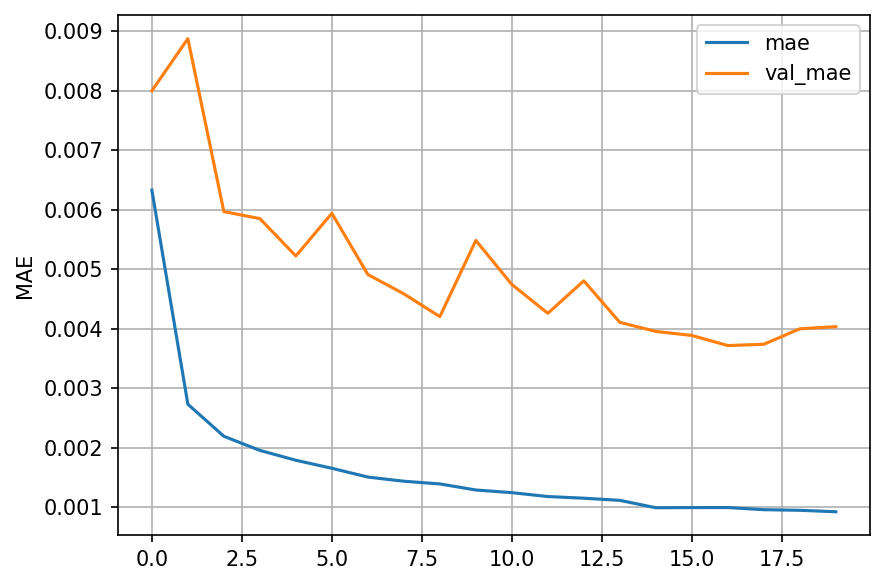

In [128]:
plt.figure()

plt.ylabel("MAE")
plt.plot(hist["mean_absolute_error"], label="mae")
plt.plot(hist["val_mean_absolute_error"], label="val_mae")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [145]:
# Evaluate model
# train_preds = model.predict(X_train)
# train_preds = np.maximum(train_preds, 0) # Don't predict negative cases
# print('Train MAE:', mae(train_preds, y_train))

# valid_preds = model.predict(X_valid)
# valid_preds = np.maximum(valid_preds, 0) # Don't predict negative cases
# print('Valid MAE:', mae(valid_preds, y_valid))

test_preds = model.predict(X_test)
test_preds = np.maximum(test_preds, 0) # Don't predict negative cases

print('Test MAE:', mae(test_preds, y_test.reshape(-1)))

predict:  [-6.5217260e-05 -6.5217260e-05 -6.5217260e-05 ...  4.2552827e-04
  3.3165095e-04  2.5309599e-04]
Test MAE: 373.817755940752


In [130]:
mean_variation = X_test[:,:,0].mean(axis=1)
variation_threshold = 100
test_preds[mean_variation < variation_threshold] = mean_variation[mean_variation < variation_threshold]
print('Test MAE:', mae(test_preds, y_test.reshape(-1)))

Test MAE: 368.3942544468679


In [139]:
model.model.save_weights("weights.h5")

In [148]:
model.model.load_weights("weights.h5")

In [131]:
def simulate_scenario(model, X_scenario, y_scenario, seq=False):
    # Simulate scenario

    X_sim = X_scenario.copy()
    X_sim_cases = X_sim[:,:,:1]
    X_sim_npis = X_sim[:,:,1:]
    y_sim = np.zeros(np.shape(y_scenario))

    nb_lookback_days = X_sim.shape[1]

    for d in range(y_sim.shape[1]):
        
        if seq:
            y = model.predict(X_sim)
        else:
            y = model.predict(X_sim.reshape(1,-1))
        y_sim[0,d,0] = max(y[0], 0)

        # Assuming constant NPIs here
        X_sim_npis = np.concatenate([X_sim_npis[:,1:], X_sim_npis[:,-1:]], axis=1)
        X_sim_cases = np.concatenate([X_sim_cases[:,1:], y.reshape(-1, 1, 1)], axis=1)

        X_sim =  np.concatenate([X_sim_cases, X_sim_npis], axis=-1)
        X_sim = np.array(X_sim)
    
    return y_sim

In [132]:
# def simulate_scenario(model, X_scenario, y_scenario, seq=False):
#     # Simulate scenario

#     X_sim = X_scenario.copy()
#     X_sim_cases = X_sim[:,:,:1]
#     X_sim_npis = X_sim[:,:,1:]
#     y_sim = np.zeros(np.shape(y_scenario))

#     nb_lookback_days = X_sim.shape[1]
    
#     y_sim = model.predict(X_sim)
    
#     return y_sim

In [133]:
def viz_scenario(geo_id, X_scenario, y_scenario, y_sim):
    mae_error = mae(y_scenario, y_sim)

    plt.figure()
    plt.title(geo_id)

    plot_input_x = np.arange(X_scenario.shape[1])
    plot_input_y = X_scenario[:,:,:1].reshape(-1)

    plt.plot(plot_input_x, plot_input_y, label="Input Scenario")

    plot_output_x = np.arange(y_scenario.shape[1])+X_scenario.shape[1]
    plot_output_x = np.concatenate([plot_input_x[-1:], plot_output_x])
    plot_output_y = np.concatenate([plot_input_y[-1:], y_scenario.reshape(-1)])
    plt.plot(plot_output_x, plot_output_y, label="Output Scenario")


    plot_output_y = np.concatenate([plot_input_y[-1:], y_sim.reshape(-1)])
    plt.plot(plot_output_x, plot_output_y, label="Output Simulation")

    plt.ylabel("New Cases")
    plt.xlabel("Days")
    ax = plt.gca()
    plt.text(0.3, 0.5, f"$MAE={mae_error:.2f}$", transform=ax.transAxes)
    plt.legend()
    plt.show()

In [149]:
def interactive_scenario(geo_id, model, seq=True):
    nb_future_days=21

    X_scenario , y_scenario = generate_scenario(df_train, df_test, geo_id, nb_lookback_days=nb_lookback_days,
        nb_future_days=nb_future_days, sequence_format=sequence_format)
    y_sim = simulate_scenario(model, X_scenario, y_scenario, seq=seq)
    
    mean_variation = X_scenario[:,:,0].reshape(-1).mean()
    print(mean_variation)
    print(X_scenario[:,:,0].reshape(-1))
    print(y_sim.reshape(-1))
    variation_threshold = 1
    if mean_variation < variation_threshold:
        y_sim[:] = mean_variation
    viz_scenario(geo_id, X_scenario, y_scenario, y_sim)
    
geo_ids = sorted(df.GeoID.unique())

w_geo_id = widgets.Dropdown(
    options=geo_ids,
    value='France__nan',
    description='GeoID:',
    disabled=False
)

interact(interactive_scenario, geo_id=w_geo_id, model=fixed(model), seq=fixed(True))

interactive(children=(Dropdown(description='GeoID:', index=100, options=('Afghanistan__nan', 'Albania__nan', '…

<function __main__.interactive_scenario(geo_id, model, seq=True)>

In [150]:
model.min[0]

0.0

In [151]:
model.max[0]

93198.57142857143